In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

Reading dataset

In [2]:
iris = pd.read_csv("C:/Users/Atharva/Desktop/DataSets/IRIS (Codsoft).csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [3]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Frequency distribution of species
iris_outcome = pd.crosstab(index=iris["species"],columns="count")

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Plot each flower to a histogram

C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

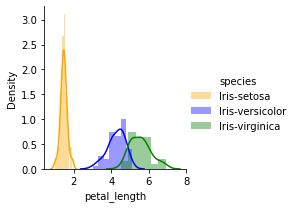

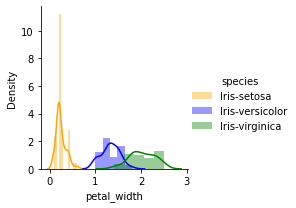

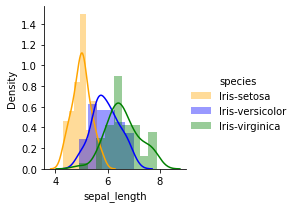

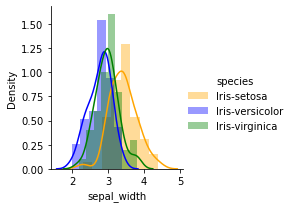

In [5]:
# Define a custom color palette to match KMeans cluster colors
palette = {'Iris-setosa': 'orange', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

# Plot using Seaborn FacetGrid based on actual species with consistent colors
grid = sns.FacetGrid(iris, hue='species', height=3, palette=palette)

grid.map(sns.distplot, "petal_length", kde=True).add_legend()

grid = sns.FacetGrid(iris, hue='species', height=3, palette=palette)

grid.map(sns.distplot, "petal_width", kde=True).add_legend()

grid = sns.FacetGrid(iris, hue='species', height=3, palette=palette)

grid.map(sns.distplot, "sepal_length", kde=True).add_legend()

grid = sns.FacetGrid(iris, hue='species', height=3, palette=palette)

grid.map(sns.distplot, "sepal_width", kde=True).add_legend()

plt.show()


Box plot

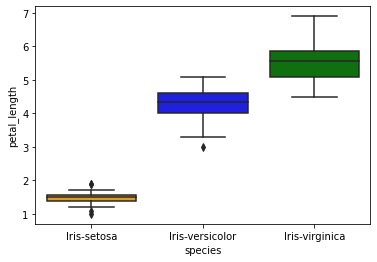

In [6]:
# Plot using Seaborn boxplot with consistent colors
sns.boxplot(x="species", y="petal_length", data=iris, palette=palette)
plt.show()

violin plot

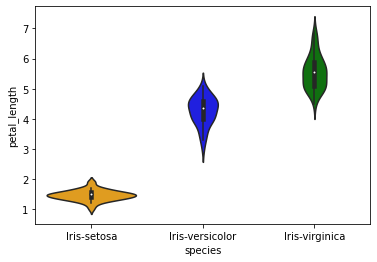

In [7]:
sns.violinplot(x="species",y="petal_length",data=iris, palette=palette)
plt.show()

Scatter plot

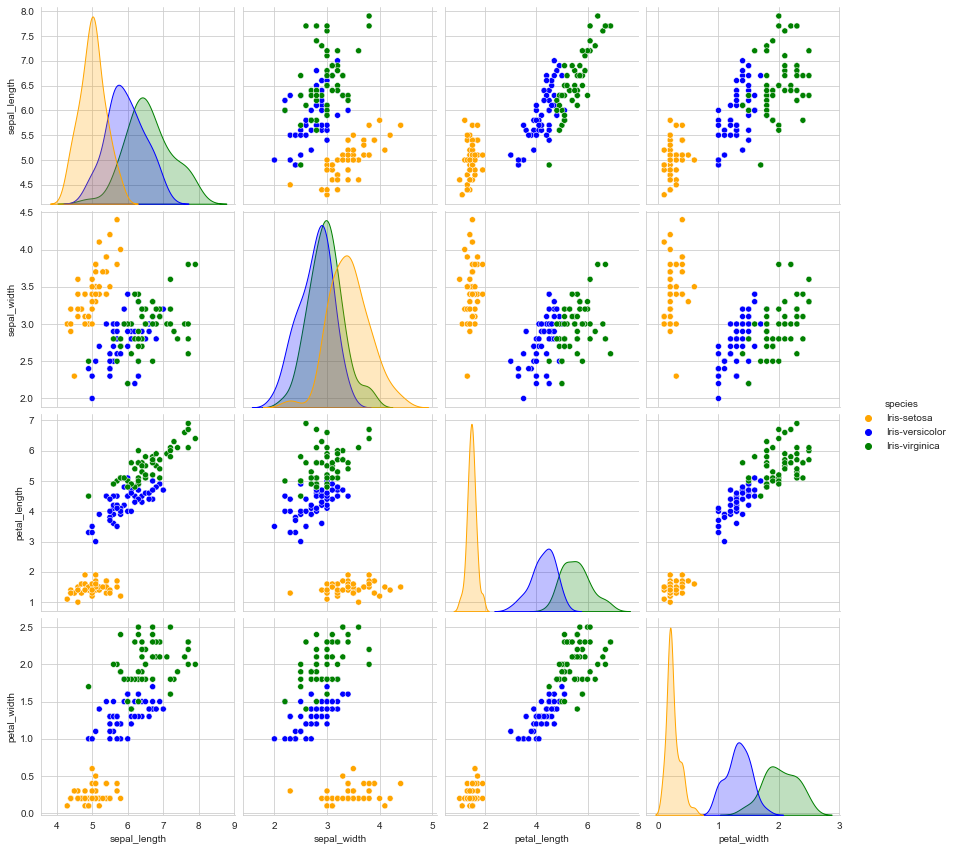

In [14]:
palette = {'Iris-setosa': 'orange', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3, palette = palette);
plt.show()

# K-Means

In [15]:
from sklearn.cluster import KMeans
wcss = []
silhouette_scores = []
ch_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    # Compute Silhouette Score and CH Index
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x, labels))
    ch_scores.append(calinski_harabasz_score(x, labels))

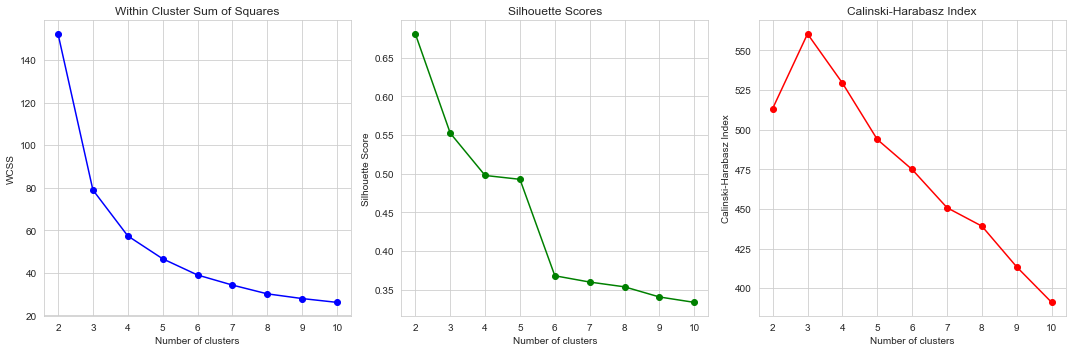

In [20]:
plt.figure(figsize=(15, 5))

# Plot WCSS
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss, marker='o', color = 'blue')
plt.title('Within Cluster Sum of Squares')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color = 'green')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

# Plot Calinski-Harabasz Index
plt.subplot(1, 3, 3)
plt.plot(range(2, 11), ch_scores, marker='o', color = 'red')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()


# Implementing K-Means Clustering for k = 3

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

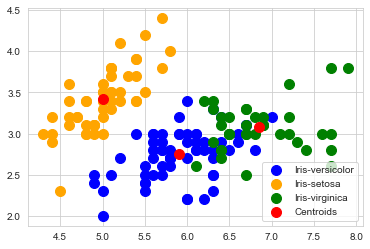

In [22]:
# Map clusters to species for coloring
species_color_mapping = {0: 'blue', 1: 'orange', 2: 'green'}
iris['cluster'] = y_kmeans
iris['species_color'] = iris['cluster'].map(species_color_mapping)

# Visualising the clusters with correct labels
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='orange', label='Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.show()


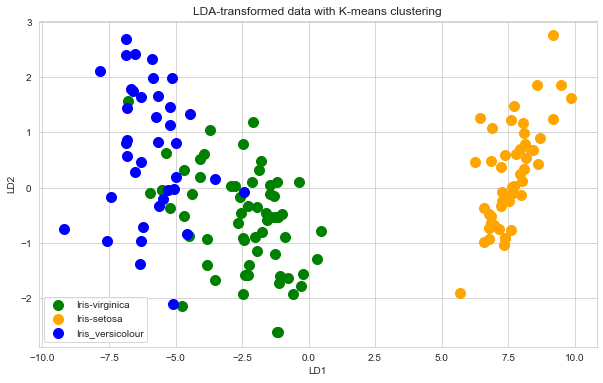

Explained variance ratio for each component: [0.99147248 0.00852752]
LDA coefficients (each row corresponds to a discriminant, and each column to a feature):
[[ 0.81926852  0.03285975]
 [ 1.5478732   2.15471106]
 [-2.18494056 -0.93024679]
 [-2.85385002  2.8060046 ]]


In [24]:
# Encode the species column
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

# Prepare feature matrix and label vector
x = iris.iloc[:, 0:4].values  # all rows, first four columns (features)
y_true = iris['species'].values  # all rows, species column (labels)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Initialize LDA and fit it to the data
lda = LDA(n_components=2)
x_lda = lda.fit(x, y_true).transform(x)

# Plotting the LDA-transformed data with cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(x_lda[y_kmeans == 0, 0], x_lda[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(x_lda[y_kmeans == 1, 0], x_lda[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x_lda[y_kmeans == 2, 0], x_lda[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris_versicolour')
plt.title('LDA-transformed data with K-means clustering')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Print the explained variance ratio for each component
print("Explained variance ratio for each component:", lda.explained_variance_ratio_)

# Print the coefficients of the linear discriminants
print("LDA coefficients (each row corresponds to a discriminant, and each column to a feature):")
print(lda.scalings_)


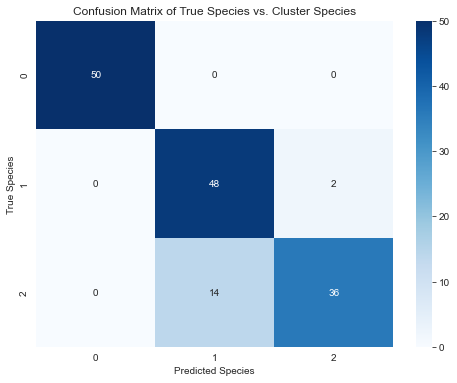

In [25]:
# Create a DataFrame to compare the true labels with the cluster labels
comparison_df = pd.DataFrame({'Cluster': y_kmeans, 'True Label': y_true})

# Map the clusters to species based on the majority class in each cluster
cluster_species_mapping = comparison_df.groupby('Cluster')['True Label'].apply(lambda x: x.mode()[0]).to_dict()
comparison_df['Cluster Species'] = comparison_df['Cluster'].map(cluster_species_mapping)

# Decode the numeric labels back to species names
comparison_df['True Species'] = label_encoder.inverse_transform(comparison_df['True Label'])
comparison_df['Cluster Species Name'] = label_encoder.inverse_transform(comparison_df['Cluster Species'])

# Generate confusion matrix with species names
confusion = confusion_matrix(comparison_df['True Species'], comparison_df['Cluster Species Name'], labels=label_encoder.classes_)

# Create a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix of True Species vs. Cluster Species')
plt.show()